## SUPPORTING FUNCTION

### Necessary Library

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Function for plotting results

In [ ]:
def print_img(imgs, row, col):
    plt.figure(figsize=(15,10))
    for i in range(len(imgs)):
        plt.subplot(row, col, i+1)
        if i == 0:
            plt.title('Original Image')
            plt.imshow(imgs[i], cmap='gray')
        elif i == 1:
            plt.title('Manual Function')
            plt.imshow(imgs[i], cmap='gray')
        else:
            plt.title('OpenCV Function')
            plt.imshow(imgs[i], cmap='gray')
    plt.show()

### INITIALIZE CIRCULAR KERNEL

In [ ]:
def circular_kernel(radius):
    # initialize the kernel matrix with zeros 
    kernel = np.zeros((2*radius+1, 2*radius+1), np.uint8)
    # create a meshgrid of the same size as the kernel
    x, y = np.ogrid[-radius:radius+1, -radius:radius+1]
    # create a circular mask
    f = x**2 + y**2 <= radius**2
    kernel[f] = 1
    return kernel

## 1. BINARY IMAGE

### Pre-process binary image

In [ ]:
def pre_process(image_path):
    img = cv.imread(image_path, 0)
    (thresh, img) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    #plt.imshow(img, cmap='gray')
    return img

processed_img = pre_process('Lenna.png')

### Dilation Operator

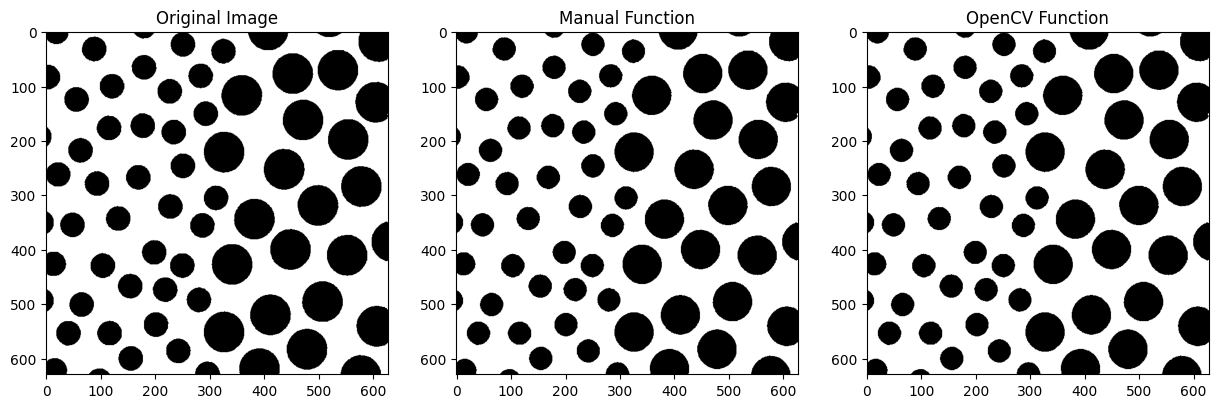

In [ ]:
def dilation(img, kernel):
    # find the center of the kernel
    kernel_center = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # create an empty image with the same shape as the original image
    dilation_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    # height and width of the image
    height, width = img.shape

    # pad the image with zeros
    pad = (kernel.shape[0] - 1) // 2
    img = np.pad(img, pad, mode='constant')

    # loop over the image to find the dilation of the image
    for i in range(height):
        for j in range(width):
            # find the region of interest
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # if the kernel overlaps with the image
            if np.any(kernel * img[i:i_, j:j_]):
                dilation_img[i, j] = 1

    return dilation_img

kernel = np.ones((3,3), np.uint8)
print_img([processed_img, dilation(processed_img, kernel), cv.dilate(processed_img, kernel)], 1, 3)


### Erosion Operator

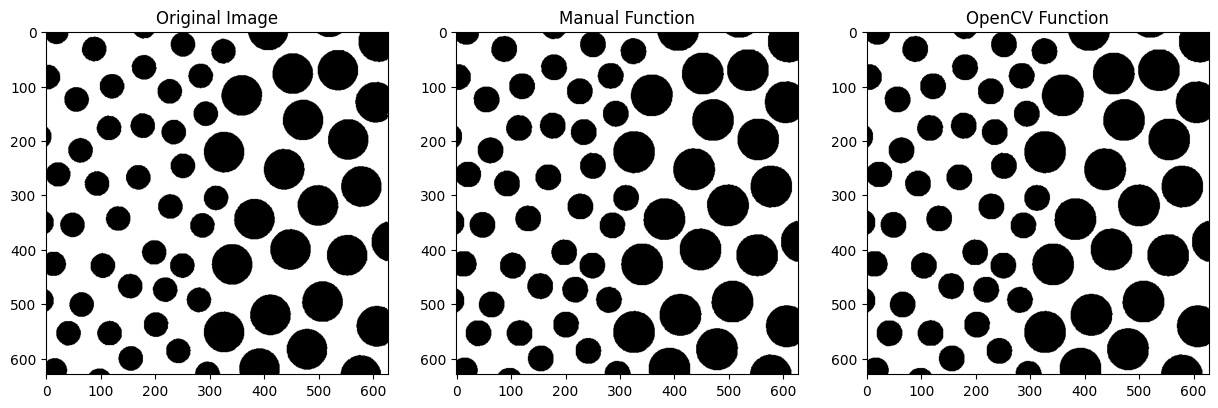

In [ ]:
def erosion(img, kernel):
    # find the center of the kernel
    kernel_center = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # create an empty image with the same shape as the original image
    erosion_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    # height and width of the image
    height, width = img.shape

    # pad the image with ones
    pad = kernel.shape[0] // 2
    img = np.pad(img, pad, mode='constant', constant_values=1)

    # loop over the image to find the erosion of the image
    for i in range(height):
        for j in range(width):
            # find the region of interest
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # if the kernel overlaps with the image
            if np.all(kernel * img[i:i_, j:j_]):
                erosion_img[i + kernel_center[0] - 1, j + kernel_center[1] - 1] = 1

    return erosion_img

print_img([processed_img, erosion(processed_img, kernel), cv.erode(processed_img, kernel)], 1, 3)

### Opening Operator

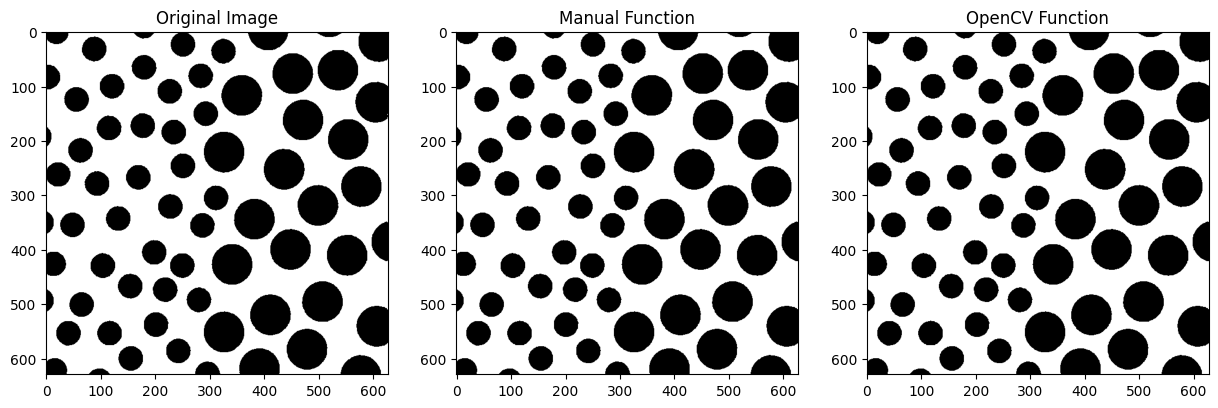

In [ ]:
def opening(img, kernel):
    return dilation(erosion(img, kernel), kernel)

print_img([processed_img, opening(processed_img, kernel), cv.morphologyEx(processed_img, cv.MORPH_OPEN, kernel)], 1, 3)

### Closing Operator

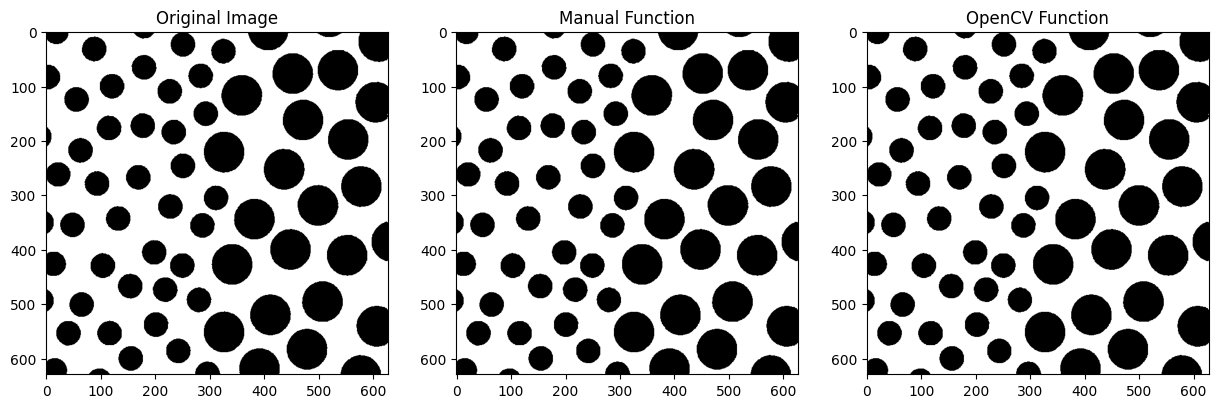

In [ ]:
def closing(img, kernel):
    return erosion(dilation(img, kernel), kernel)

print_img([processed_img, closing(processed_img, kernel), cv.morphologyEx(processed_img, cv.MORPH_CLOSE, kernel)], 1, 3)

### Morphological Boundary Extraction

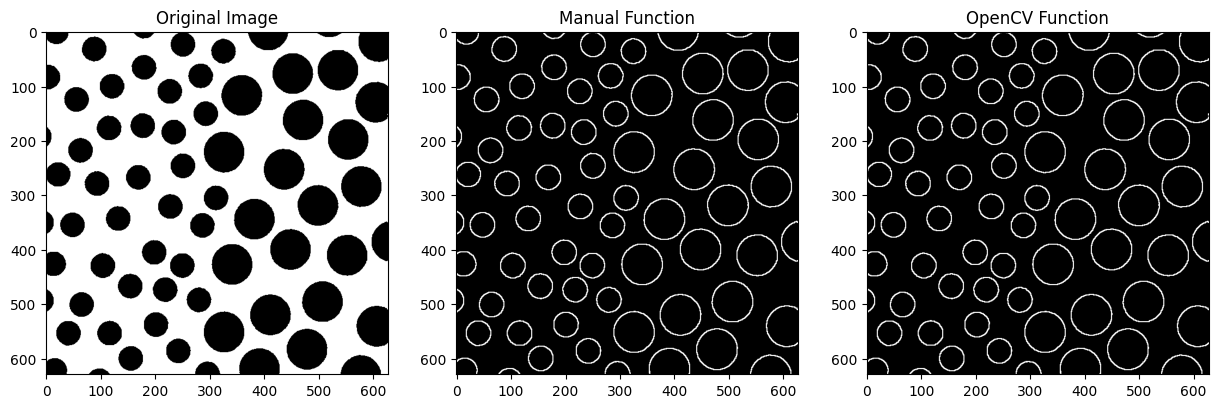

In [ ]:
def boundary_extraction(img, kernel):
    return dilation(img, kernel) - erosion(img, kernel)

print_img([processed_img, boundary_extraction(processed_img, kernel), cv.morphologyEx(processed_img, cv.MORPH_GRADIENT, kernel)], 1, 3)


## 2. GRAYSCALE IMAGE

### Pre-process grayscale image

In [ ]:
def pre_process_gray(image_path):
    img = cv.imread(image_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img

processed_img_gray = pre_process_gray('test2.jpg')

### Dilation Operator

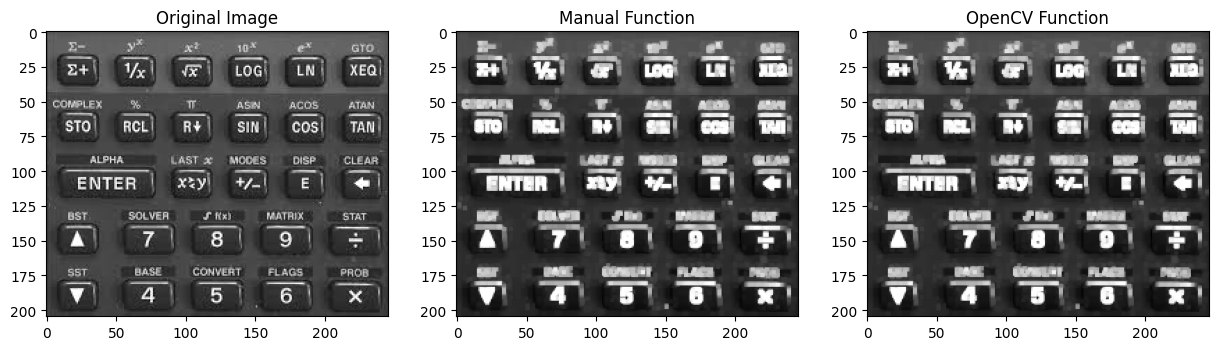

In [ ]:
def dilation2(img, kernel):
    # find the center of the kernel
    kernel_center = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # create an empty image with the same shape as the original image
    dilation_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    # height and width of the image
    height, width = img.shape

    # pad the image with zeros
    pad = (kernel.shape[0] - 1) // 2
    img = np.pad(img, pad, mode='constant')

    # loop over the image to find the dilation of the image
    for i in range(height):
        for j in range(width):
            # find the region of interest
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # if the kernel overlaps with the image
            if np.any(kernel * img[i:i_, j:j_]):
                dilation_img[i, j] = np.max(img[i:i_, j:j_])

    return dilation_img

# kernel for processing gray image
kernel = np.ones((3,3), np.uint8)

print_img([processed_img_gray, dilation2(processed_img_gray, kernel), cv.dilate(processed_img_gray, kernel)], 1, 3)

### Erosion Operator

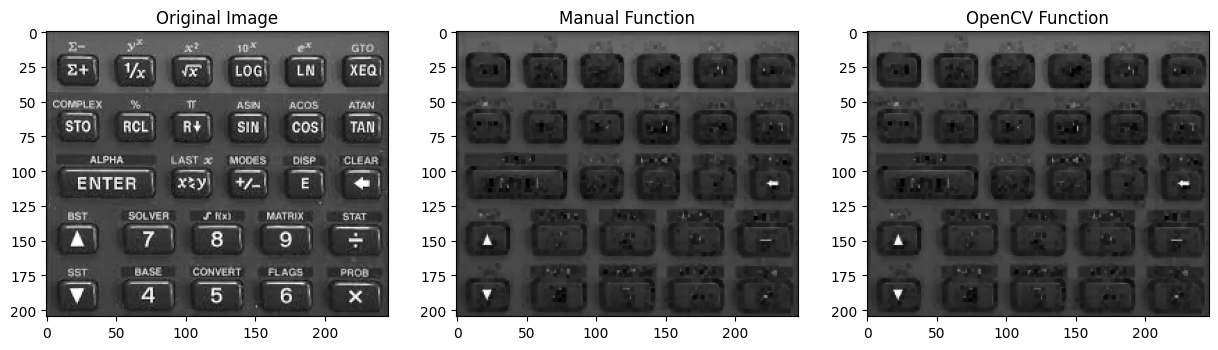

In [ ]:
def erosion2(img, kernel):
    # erosion for gray scale image
    # find the center of the kernel
    kernel_center = (kernel.shape[0] // 2, kernel.shape[1] // 2)
    # create an empty image with the same shape as the original image
    erosion_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    # height and width of the image
    height, width = img.shape

    # pad the image with ones
    pad = kernel.shape[0] // 2
    img = np.pad(img, pad, mode='constant', constant_values=255)

    # loop over the image to find the erosion of the image
    for i in range(height):
        for j in range(width):
            # find the region of interest
            i_ = i + kernel.shape[0]
            j_ = j + kernel.shape[1]
            # if the kernel overlaps with the image
            if np.all(kernel * img[i:i_, j:j_]):
                erosion_img[i + kernel_center[0] - 1, j + kernel_center[1] - 1] = np.min(kernel * img[i:i_, j:j_])

    return erosion_img

print_img([processed_img_gray, erosion2(processed_img_gray, kernel), cv.erode(processed_img_gray, kernel)], 1, 3)

### Opening Operator

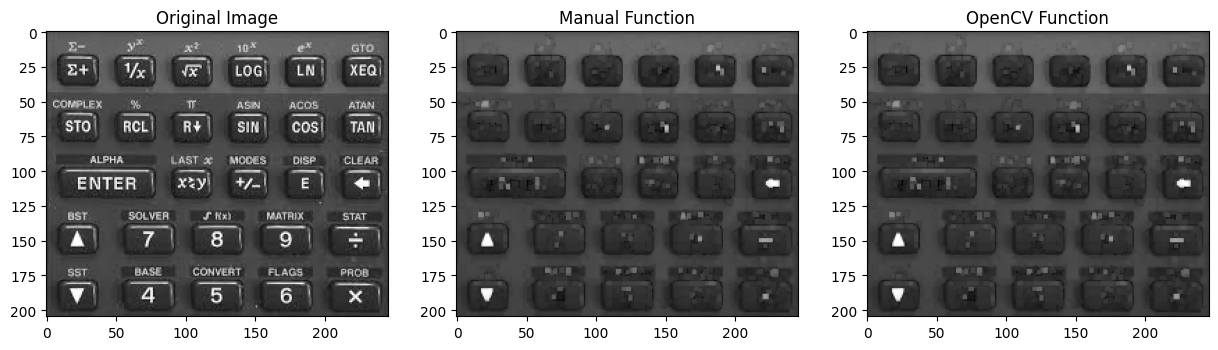

In [ ]:
def opening2(img, kernel):
    return dilation2(erosion2(img, kernel), kernel)

print_img([processed_img_gray, opening2(processed_img_gray, kernel), cv.morphologyEx(processed_img_gray, cv.MORPH_OPEN, kernel)], 1, 3)

### Closing Operator

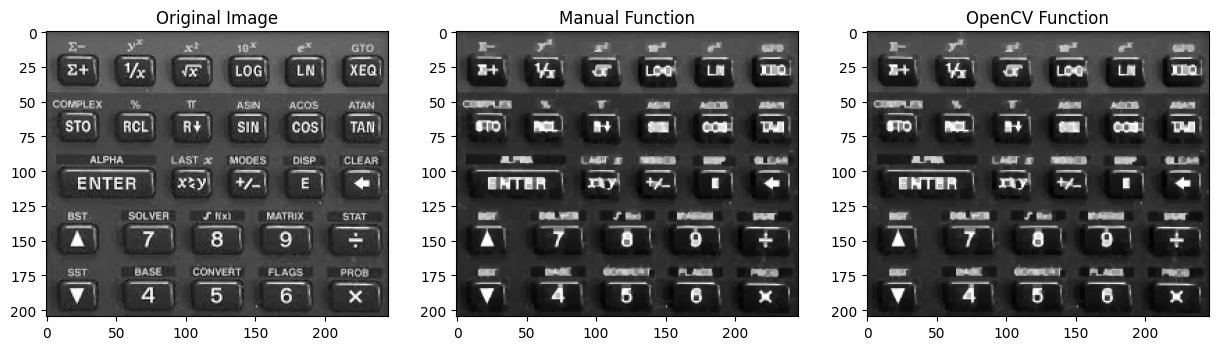

In [ ]:
def closing2(image, kernel):
    return erosion2(dilation2(image, kernel), kernel)

print_img([processed_img_gray, closing2(processed_img_gray, kernel), cv.morphologyEx(processed_img_gray, cv.MORPH_CLOSE, kernel)], 1, 3)

### Morphological Gradient

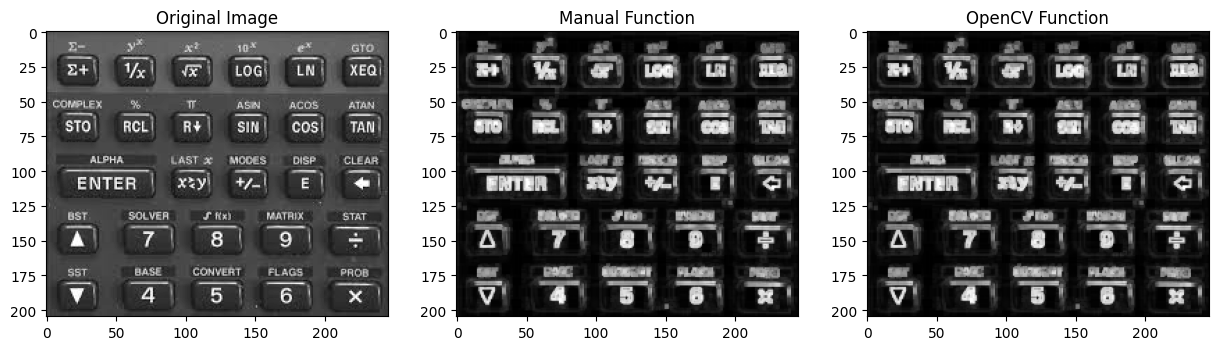

In [ ]:
def gradient(img, kernel):
    return dilation2(img, kernel) - erosion2(img, kernel)

print_img([processed_img_gray, gradient(processed_img_gray, kernel), cv.morphologyEx(processed_img_gray, cv.MORPH_GRADIENT, kernel)], 1, 3)

### Top-Hat Transformation

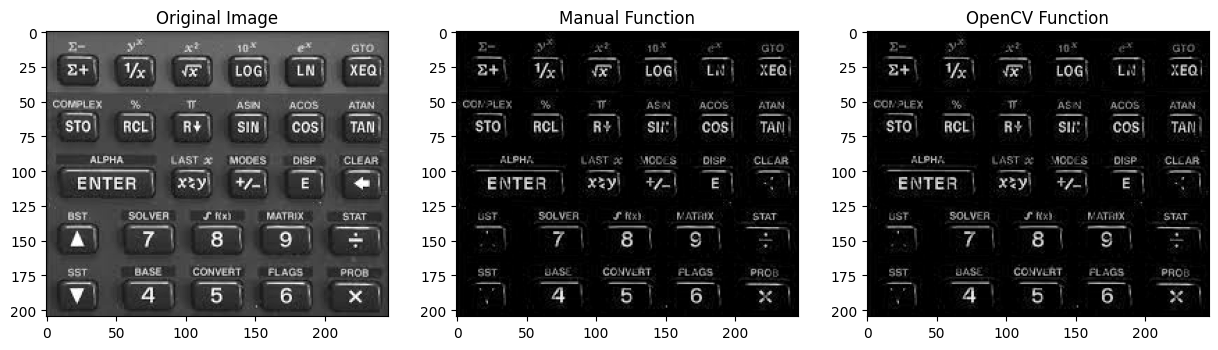

In [ ]:
def top_hat(img, kernel):
    return img - opening2(img, kernel)

print_img([processed_img_gray, top_hat(processed_img_gray, kernel), cv.morphologyEx(processed_img_gray, cv.MORPH_TOPHAT, kernel)], 1, 3)

### Black-Hat Transformation

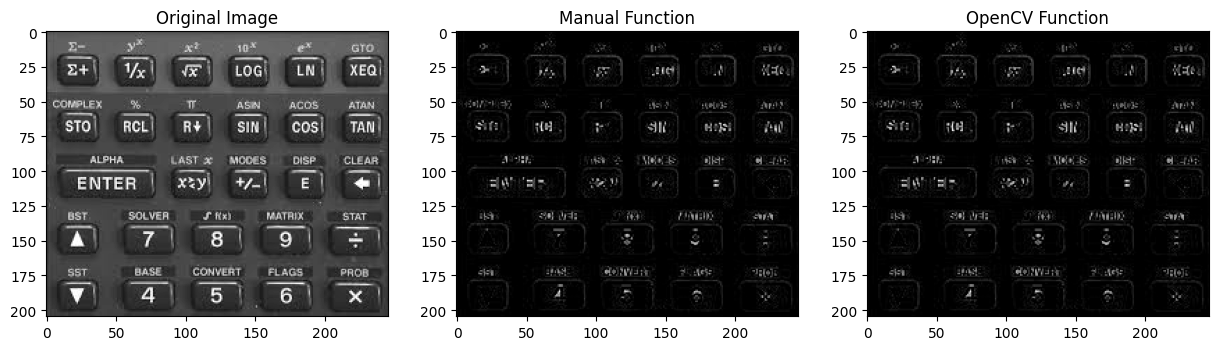

In [ ]:
def black_hat(img, kernel):
    return closing2(img, kernel) - img

print_img([processed_img_gray, black_hat(processed_img_gray, kernel), cv.morphologyEx(processed_img_gray, cv.MORPH_BLACKHAT, kernel)], 1, 3)

### Morphological Smoothing

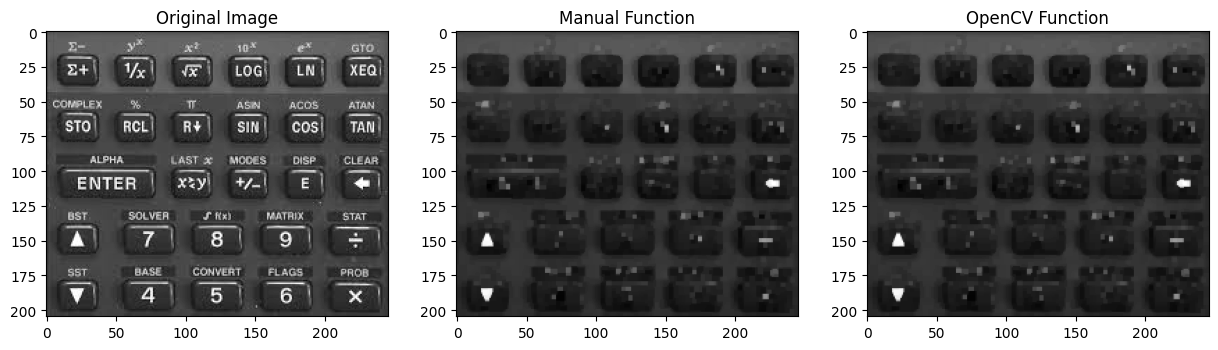

In [ ]:
def smooth(img, kernel):
    return closing2(opening2(img, kernel), kernel)

print_img([processed_img_gray, smooth(processed_img_gray, kernel), cv.morphologyEx(cv.morphologyEx(processed_img_gray, cv.MORPH_OPEN, kernel), cv.MORPH_CLOSE, kernel)], 1, 3)

### Textual Segmentation

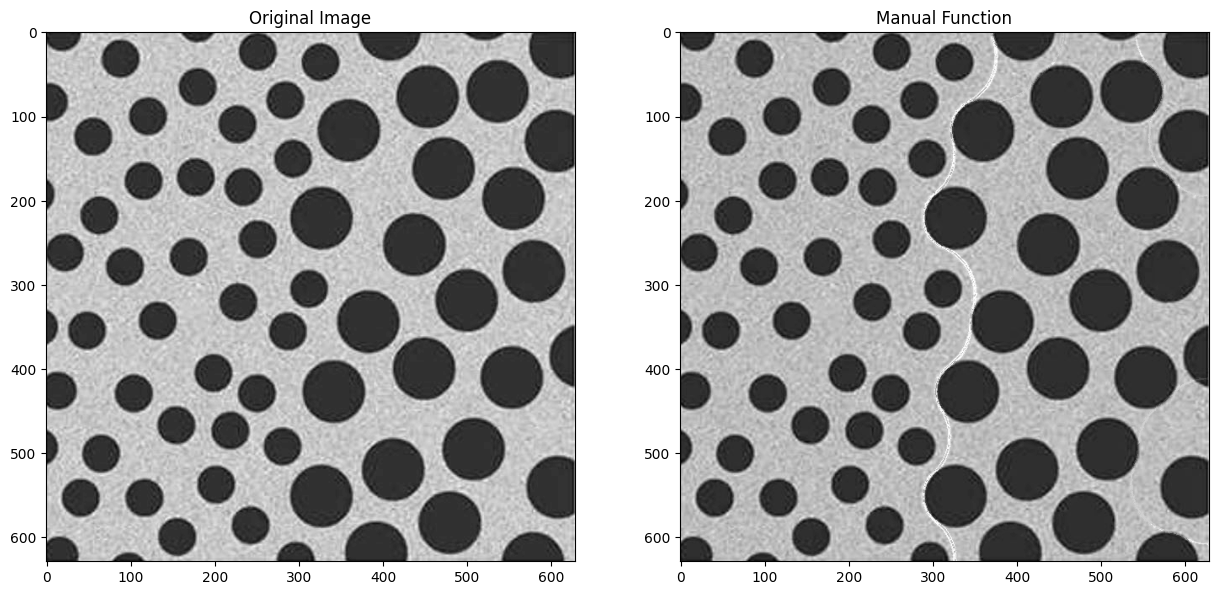

In [ ]:
img_gray = pre_process_gray('test.jpg')

def textual_segment(img, kernel1, kernel2, kernel):
    #return gradient(opening2(closing2(img, kernel1), kernel2), kernel)
    return cv.morphologyEx(cv.morphologyEx(cv.morphologyEx(img, cv.MORPH_CLOSE, kernel1), cv.MORPH_OPEN, kernel2), cv.MORPH_GRADIENT, kernel)

kernel1 = circular_kernel(30)
kernel2 = circular_kernel(60)
kernel = np.ones((3,3), np.uint8)

result = cv.bitwise_or(textual_segment(img_gray, kernel1, kernel2, kernel), img_gray)

# plt.imshow(result, cmap='gray')

print_img(([img_gray, result]), 1, 2)